<a href="https://colab.research.google.com/github/Gweneal3/Machine_Learning_YT/blob/master/Medical%20Insurance%20Cost%20Prediction/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Preprocessing

In [27]:
insurance_data = pd.read_csv("./insurance.csv")

In [28]:
print(insurance_data.shape)

(1338, 7)


In [29]:
print(insurance_data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [30]:
print(insurance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Data Analysis

In [31]:
print(insurance_data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


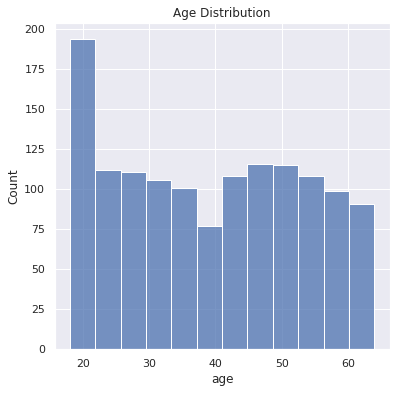

In [32]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_data.age)
plt.title('Age Distribution')
plt.show()

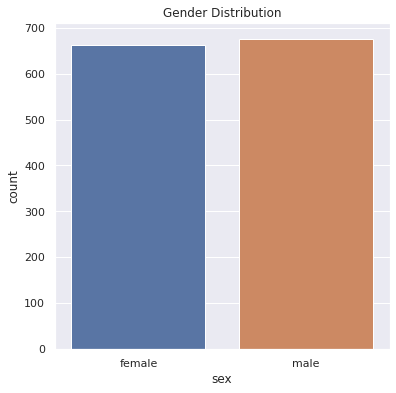

In [33]:
# Gender
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Gender Distribution')
plt.show()

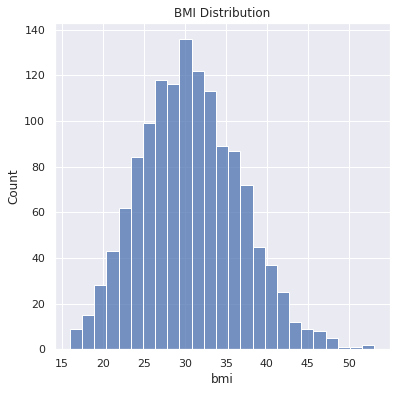

In [34]:
# BMI
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_data.bmi)
plt.title('BMI Distribution')
plt.show()

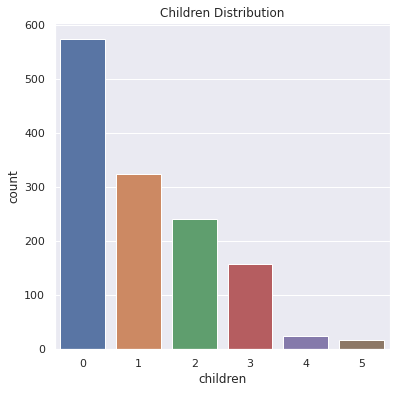

In [35]:
# Children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('Children Distribution')
plt.show()

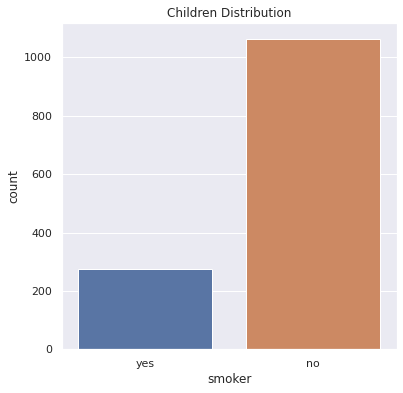

In [36]:
# Smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Children Distribution')
plt.show()

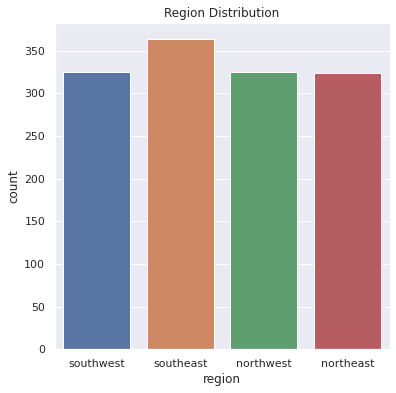

In [37]:
# Region
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Region Distribution')
plt.show()

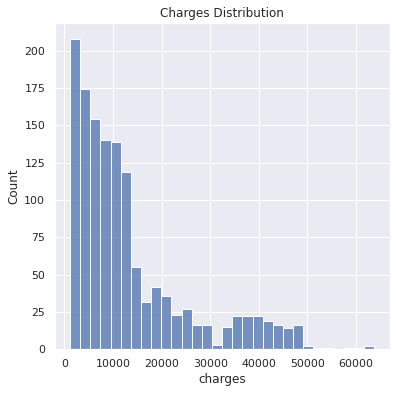

In [38]:
# charges
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_data.charges)
plt.title('Charges Distribution')
plt.show()

Encoding

In [39]:
print(insurance_data.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [40]:
insurance_data.replace({'sex':{'female':0,'male':1},
                       'smoker':{'no':0,'yes':1},
                       'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

Split Feature and Target

In [41]:
X = insurance_data.drop('charges',axis=1)
Y = insurance_data['charges']

Train Test Split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [55]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Training Model

In [62]:
model = LinearRegression()

In [76]:
model.fit(X_train.values,Y_train.values)

LinearRegression()

Model Evaluation

In [77]:
X_train_prediction = model.predict(X_train.values)

In [70]:
# r2 value
error_score = metrics.r2_score(Y_train,X_train_prediction)

In [71]:
print(error_score)

0.7518195459072954


In [78]:
X_test_prediction = model.predict(X_test.values)

In [52]:
# r2 value
error_score_test = metrics.r2_score(Y_test,X_test_prediction)

In [53]:
print(error_score_test)

0.7454471618659976


Predictive System

In [79]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction[0])

27524.889812064637
